In [14]:
# 1. IMPORTING LIBRARIES 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
import tensorflow as tf 
from tensorflow.keras import layers, models 

In [15]:
# 2. LOAD DATASET 
titanic = sns.load_dataset ('titanic') 
titanic.head () 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# 3. DATA PREPROCESING 
# Drop rows with missing values in 'embarked' and 'age' 
titanic = titanic.dropna (subset = ['embarked', 'age'])

In [17]:
# Convert categorical variables into numerical values 
titanic['sex'] = titanic['sex'].map ({'male': 0, 'female': 1}) 
titanic['embarked'] = titanic['embarked'].map ({'C': 0, 'Q': 1, 'S': 2}) 
titanic ['class'] = titanic['class'].map ({'First': 1, 'Second': 2, 'Third': 3})

In [18]:
# Drop irrelevant columns 
titanic = titanic.drop (['deck', 'embark_town', 'alive', 'who', 'adult_male', 'alone'], axis = 1) 
titanic = titanic.drop (['sibsp', 'parch'], axis = 1) 
titanic = titanic.drop (['pclass'], axis = 1)

In [19]:
# Fill missing values in 'age' with the median 
titanic['age'] = titanic['age'].fillna (titanic['age'].median ())

In [20]:
# Convert the 'survived' column to a numpy array of integers 
Y = titanic.pop('survived').values 
titanic

,sex,age,fare,embarked,class
0,0,22.0,7.2500,2,3
1,1,38.0,71.2833,0,1
2,1,26.0,7.9250,2,3
3,1,35.0,53.1000,2,1
4,0,35.0,8.0500,2,3
...,...,...,...,...,...
885,1,39.0,29.1250,1,3
886,0,27.0,13.0000,2,2
887,1,19.0,30.0000,2,1
889,0,26.0,30.0000,0,1


In [21]:
Y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [22]:
# Standardize the numerical features 
scaler = StandardScaler () 
X = scaler.fit_transform (titanic)

In [23]:
# 3. Split the dataset into training and testing sets 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 42) 


In [24]:
X_train.shape

(569, 5)

In [12]:
X_train

array([[ 1.32251077,  0.23185562, -0.12886698,  0.51958818, -0.28719141],
       [ 1.32251077,  0.85328448, -0.16194736,  0.51958818, -0.28719141],
       [-0.75613751, -0.3205256 , -0.40768727,  0.51958818, -0.28719141],
       ...,
       [-0.75613751,  1.06042744, -0.50125747,  0.51958818,  0.90859974],
       [-0.75613751, -1.49433569,  0.04126065,  0.51958818, -0.28719141],
       [-0.75613751, -0.66576386, -0.52016054,  0.51958818,  0.90859974]])

In [25]:
# 4. BUILDING THE NEURAL NETWORK MODEL 
model = models.Sequential () 
model.add(layers.Input(shape=(X_train.shape[1],))) 

# Input Layer and First Hidden Layer 
model.add (layers.Dense (64, activation = 'relu')) 

# Second Hidden Layer 
model.add (layers.Dense (32, activation = 'relu')) 
 
# Output Layer 
model.add (layers.Dense (1, activation = 'sigmoid')) 
 
# 5. COMPILING THE MODEL 
model.compile (optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = ['accuracy']) 





In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Batch Size - A batch size of 32 is commonly used to balance speed and stability during training 
# Epoch: An epoch is one complete pass through the entire training dataset. During each epoch, 
# the model updates its weights based on the gradients computed from the loss function and the training data 
 
history = model.fit (X_train, Y_train, epochs = 50, batch_size = 32, validation_data = 
(X_test, Y_test))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6562 - loss: 0.6566 - val_accuracy: 0.7203 - val_loss: 0.6045
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7845 - loss: 0.5569 - val_accuracy: 0.7413 - val_loss: 0.5523
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8076 - loss: 0.4869 - val_accuracy: 0.7902 - val_loss: 0.5208
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7966 - loss: 0.4533 - val_accuracy: 0.7832 - val_loss: 0.5016
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7903 - loss: 0.4344 - val_accuracy: 0.7762 - val_loss: 0.4942
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7833 - loss: 0.4399 - val_accuracy: 0.7762 - val_loss: 0.4964
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7785 - loss: 0.4454 - val_accuracy: 0.7762 - val_loss: 0.4960
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7935 - loss: 0.4328 - val_accuracy: 0.7762 - val_loss

In [28]:
# 6. EVALUATE THE MODEL 
test_loss, test_acc = model.evaluate (X_test, Y_test, verbose = 2) 
print (f'\nTest Accuracy: {test_acc}') 

5/5 - 0s - 9ms/step - accuracy: 0.8112 - loss: 0.5059

Test Accuracy: 0.811188817024231


In [29]:
# 7. Predict the datasets 
 
predictions = model.predict (X_test) 
# Convert probabilities to 0 or 1 
predicted_classes = (predictions > 0.5).astype ("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [30]:
# 8. Evaluate Accuracy 
accuracy = accuracy_score (Y_test, predicted_classes) 
print (f'Prediction Accuracy: {accuracy}') 

Prediction Accuracy: 0.8111888111888111


Text(0.5, 1.0, 'Accuracy')

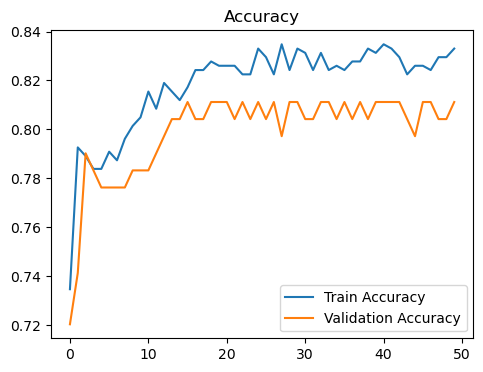

In [32]:
# 9. PLOTTING 
plt.figure (figsize = (12, 4)) 
# Accuracy Plot 
plt.subplot (1, 2, 1) 
plt.plot (history.history['accuracy'], label = 'Train Accuracy') 
plt.plot (history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend () 
plt.title ('Accuracy') 

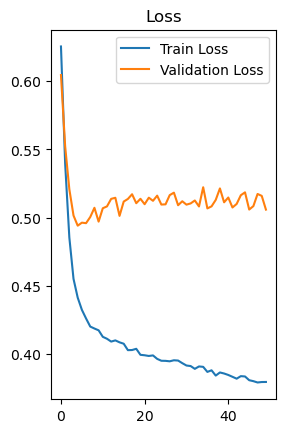

In [33]:
 
# Loss Plot 
plt.subplot (1, 2, 2) 
plt.plot (history.history['loss'], label = 'Train Loss') 
plt.plot (history.history['val_loss'], label = 'Validation Loss') 
plt.legend () 
plt.title ('Loss') 
plt.show ()